In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'dataset.csv' with the actual file name or path to your dataset
df = pd.read_csv('D:/Zeotap Assignment/Customers.csv')

In [2]:
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
# Display dataset information
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
Series([], dtype: int64)


In [5]:
# Summary statistics for numerical columns
print("\nSummary Statistics (Numerical Columns):")
print(df.describe())


Summary Statistics (Numerical Columns):
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [6]:
# Convert SignupDate to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

In [7]:
# Extract year and month from SignupDate
df['SignupYear'] = df['SignupDate'].dt.year
df['SignupMonth'] = df['SignupDate'].dt.month

In [8]:
# Count customers by region
region_counts = df['Region'].value_counts()
print("\nCustomer Count by Region:")
print(region_counts)


Customer Count by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


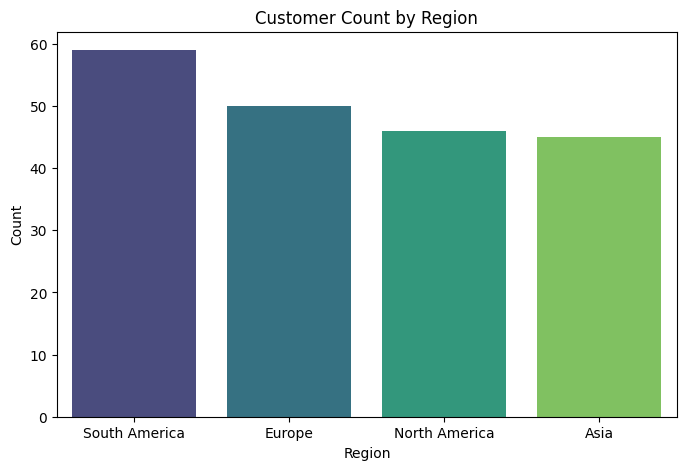

In [9]:
# Visualize customer count by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Customer Count by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

In [10]:
# Analyze signup trends by year
signup_year_counts = df['SignupYear'].value_counts().sort_index()
print("\nSignups by Year:")
print(signup_year_counts)


Signups by Year:
SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


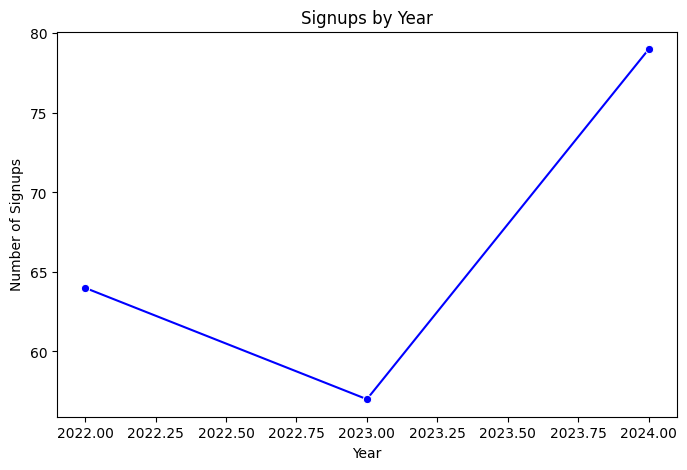

In [11]:
# Visualize signups by year
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_year_counts.index, y=signup_year_counts.values, marker='o', color='blue')
plt.title("Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.show()

In [12]:
# Seasonal analysis: signups by month
signup_month_counts = df['SignupMonth'].value_counts().sort_index()
print("\nSignups by Month:")
print(signup_month_counts)


Signups by Month:
SignupMonth
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
Name: count, dtype: int64


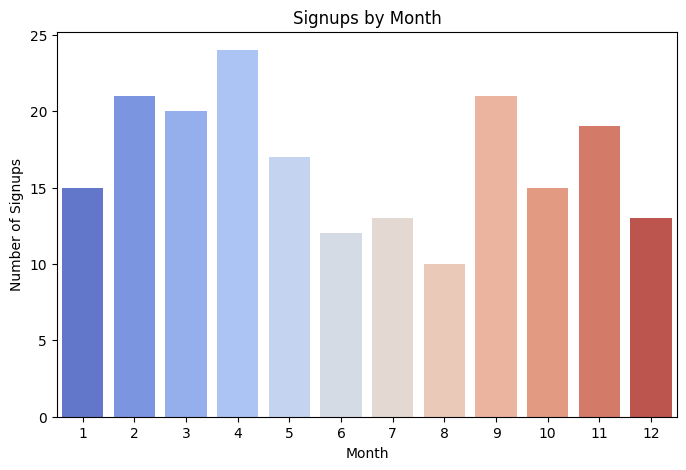

In [13]:
# Visualize signups by month
plt.figure(figsize=(8, 5))
sns.barplot(x=signup_month_counts.index, y=signup_month_counts.values, palette="coolwarm")
plt.title("Signups by Month")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()

In [14]:
# Business insights derived
business_insights = [
    "1. Most customers are from the '{}' region, making it the key area for targeted marketing campaigns.".format(region_counts.idxmax()),
    "2. The year {} recorded the highest customer signups, indicating a period of growth or successful marketing strategies.".format(signup_year_counts.idxmax()),
    "3. Customer signups peak during month {} which might indicate a seasonal trend to focus promotional efforts.".format(signup_month_counts.idxmax()),
    "4. There are gaps in signups from regions like '{}' indicating opportunities for market expansion.".format(', '.join(region_counts[region_counts == region_counts.min()].index)),
    "5. Customers who signed up in the past two years represent a growing trend, suggesting a shift towards newer customer acquisition strategies."
]

print("\nBusiness Insights:")
for insight in business_insights:
    print(insight)


Business Insights:
1. Most customers are from the 'South America' region, making it the key area for targeted marketing campaigns.
2. The year 2024 recorded the highest customer signups, indicating a period of growth or successful marketing strategies.
3. Customer signups peak during month 4 which might indicate a seasonal trend to focus promotional efforts.
4. There are gaps in signups from regions like 'Asia' indicating opportunities for market expansion.
5. Customers who signed up in the past two years represent a growing trend, suggesting a shift towards newer customer acquisition strategies.
